# BWT - Deep Learning Track
## Task: 19
### Adil Mubashir Chaudhry

Task 19 Topics: 
- Introduction to Deep Learning
- Building Block of Deep Learning
- A look on Neural Network
- Tensor Operations

these topics are more to understand of deep learning. The first half of this notebook will deal with the concepts and the second half will deal with coding

## AI vs ML vs DL

### Artificial Intelligence
It is defined as "the effort to automate intellectual tasks normally performed by humans"

### Machine Learning
A system that is trained using data to perform computations on problems it has not seen before
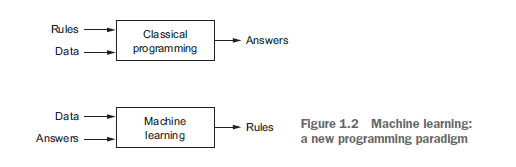

### Deep Learning
Specific subfield of macine laerning that puts emphasis of learning using successive layers of more meaningful representation of the data. The deep in deep learning comes from the depth of the layers in a deep learning network
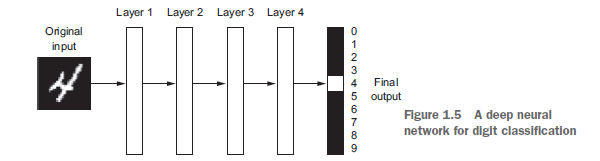

## Understanding how deep learning works
The specification of what a layer does to an input depends on the weights assigned to that layer. These weights are altered when training the data so that the prediction of our model matches the answers
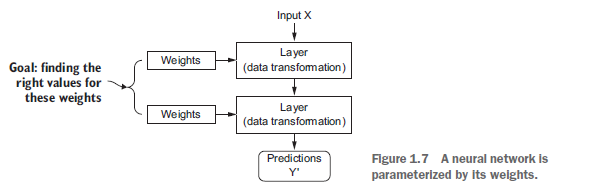

To analyze how well our network performs we use some sorf of loss function which determines how far off our predictions was to the actual answer. This is known as forward pass
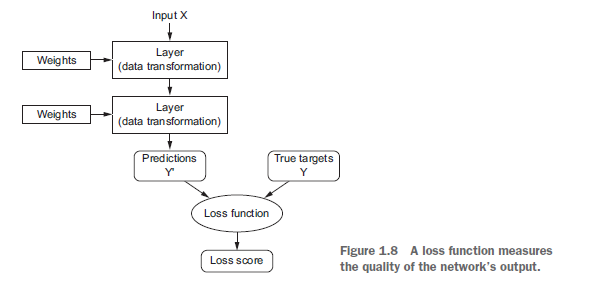

This is then put into an optimizer which adjusts the weights. This is call back propogation
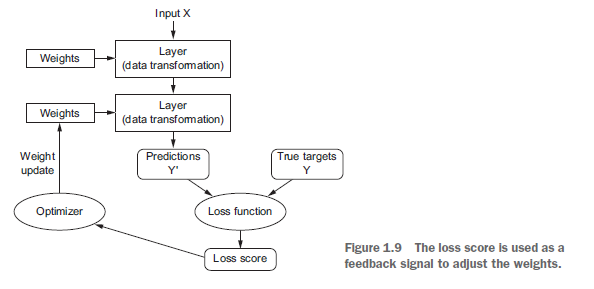

# Mathematical Building Blocks of Neural Networks

understanding deep learning requires fimiliarity with simple mathemaatical concepts : tensors, tensor operations, differentaition, gradient descent and so on.

## First look into neural networks

using the MNIST dataset we will check how a neural network is able to recognize digits. First we will  load the mnist dataset into its train and test sets

In [2]:
from keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape

11490434/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

we will feed the neural network training data. The network will associate the images and labels and then we will have it make predicitons on the test data. Using the test_labels we will verify whether we have the correct answers. We will create a sequential model with 512 inputs. 

The reason for this number of inputs is that the images we have are 28x28 pixels. Using each pixel as an input feature we want our input layers nodes to be equal to the number of input features i.e the number of pixel. 

The output layer has 10 nodes corresponding to the 10 digits.

In [4]:
from keras import models
from keras import layers

In [7]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [8]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [11]:
from keras.utils import to_categorical

In [12]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2659 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1075 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0709 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0516 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0388 - accuracy: 0.9886


In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9790
test_acc:  0.9789999723434448


# Data Representations for neural networks

All current machine learning systems use tensor as their basic data structure.

So what is a tensor?

A tensor at its core is a container of data almost always numerical data.

## Scalers - 0D tensors
A tensor containing only one number is called a scaler
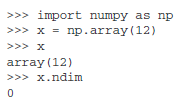

## Vector - 1D tensor
An array of numbers is called a vector
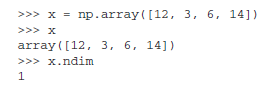

## Matrices - 2D tensor
An array of vectors is called a matrix
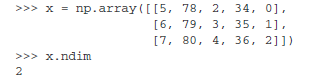

and then there are 3d and higher dimensional tensors

## Key Attributes
- Number of axes (rank)—For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.

- Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape
(3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape
with a single element, such as (5,), whereas a scalar has an empty shape, ().

- Data type (usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on. On rare occasions, you may see a char tensor. Note that string tensors don’t exist in Numpy (or in most other libraries), because tensors live in preallocated, contiguous memory segments: and strings, being variable length, would preclude the use of this implementation.

# Tensor Operations

All transformations learned by deep neural networks can be reduced to a handful of tensor operations applied to the tensors of numeric data. The above layer:

keras.layers.Dense(512, activation='relu')

can be interpreted as a function:

output = relu(dot(W, input) + b)

where
- dot is the dot prodict
- addition between a 2d tensor and vector b
- relu operation which is max(x,0)